In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical



In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
def preprocess_mnist(x, y):

    x = tf.expand_dims(x, axis=-1)
    x = tf.image.resize(x, (32, 32))
    x = tf.repeat(x, 3, axis=-1)


    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.resnet50.preprocess_input(x)


    y = to_categorical(y, 10)

    return x, y


In [4]:
x_train_pp, y_train_pp = preprocess_mnist(x_train, y_train)
x_test_pp, y_test_pp = preprocess_mnist(x_test, y_test)

In [5]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3)
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
base_model.trainable = False

In [7]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
history = model.fit(
    x_train_pp,
    y_train_pp,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 253s 557ms/step - accuracy: 0.5954 - loss: 1.6525 - val_accuracy: 0.9087 - val_loss: 0.3135
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 245s 517ms/step - accuracy: 0.8443 - loss: 0.4815 - val_accuracy: 0.9273 - val_loss: 0.2623
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 222s 527ms/step - accuracy: 0.8545 - loss: 0.4492 - val_accuracy: 0.9235 - val_loss: 0.2586
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 258s 517ms/step - accuracy: 0.8571 - loss: 0.4333 - val_accuracy: 0.9280 - val_loss: 0.2478
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 237s 563ms/step - accuracy: 0.8632 - loss: 0.4208 - val_accuracy: 0.9283 - val_loss: 0.2460


In [10]:
test_loss, test_acc = model.evaluate(x_test_pp, y_test_pp, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9229


In [11]:
num_images = 30

In [12]:
sample_images = x_test_pp[:num_images]
sample_labels = y_test[:num_images]


In [13]:
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


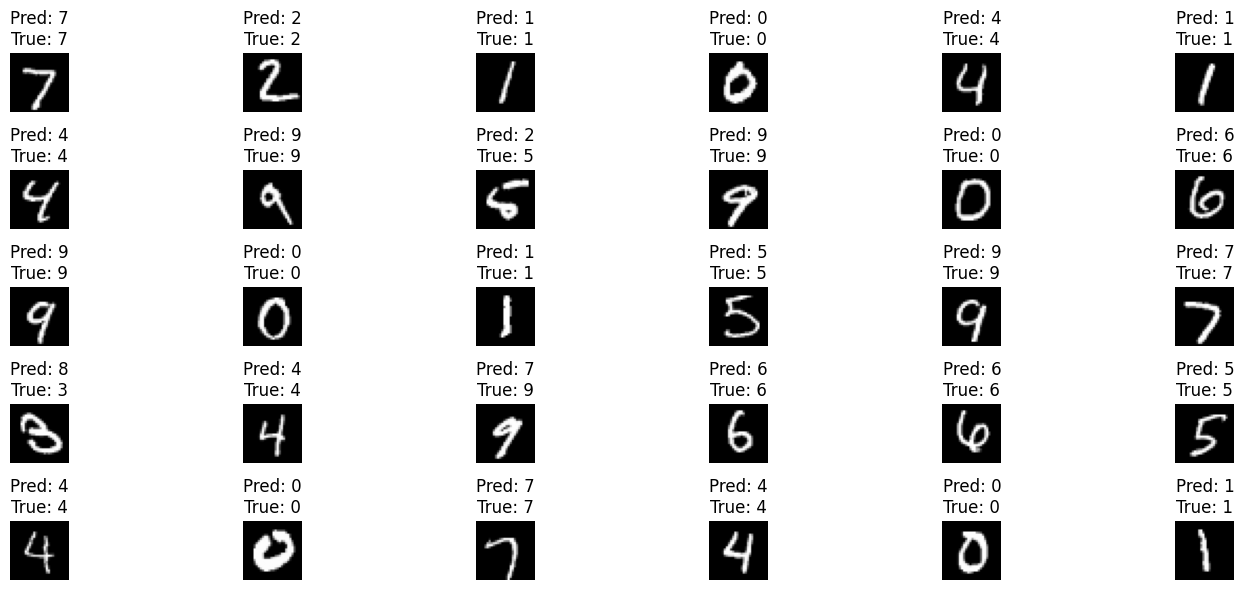

In [14]:
plt.figure(figsize=(15, 6))

for i in range(num_images):
    plt.subplot(5, 6, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {sample_labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()